In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
C_GREEN = '#369645'
C_RED = '#CE4127'
C_BLUE = '#3470B2'
C_YELLOW = '#D7CA47'
C_ORANGE = '#DE7D43'
C_LIGHTGREEN = '#5FB75E'
C_GREY = '#b1a7a6'

# Figure 1 Reproduction
<img src="./plot/fig1_paper.jpg" width="25%" height="25%" title="Fig1"/>

## Fig1-b. Country of origin, cancer stage, tumor site, and vital status proportions in the cohort.
- Input Data: table_s1.xlsx (Sheet: Clinical_data)


In [4]:
b_df = pd.read_excel('table_s1.xlsx', sheet_name='Clinical_data').fillna('NA')
b_df.head()

,case_id,tumor_included_for_the_study,normal_included_for_the_study,histology_diagnosis,age,sex,race,participant_country,tumor_site,tumor_focality,...,Islet_fraction,Stromal_fraction,Non_neoplastic_duct,Fat_fraction,Inflammation_fraction,Muscle_fraction,follow_up_days,vital_status,is_this_patient_lost_to_follow_up,cause_of_death
0,C3L-00102,yes,yes,PDAC,42,Male,White,United States,head,Unifocal,...,2,60,1,4,7,0,249.0,Deceased,No,pancreatic carcinoma
1,C3L-00189,yes,yes,PDAC,68,Female,NA,Canada,head,Unifocal,...,1;3;2,75;55;53,2;1;0,0;6;0,7;30;25,0;0;0,1035.0,Deceased,No,pancreatic carcinoma
2,C3L-00277,yes,yes,PDAC,69,Male,White,Other,tail,Unifocal,...,0,55,0,0,5,0,610.0,Deceased,Yes,pancreatic carcinoma
3,C3L-00401,yes,yes,PDAC,62,Female,NA,Canada,body,Unifocal,...,2;2;3,35;30;32,3;10;10,0;0;0,10;13;5,0;0;0,1228.0,Living,No,na
4,C3L-00640,yes,yes,PDAC,59,Female,White,United States,body,Unifocal,...,0;0,55;44,0;0,0;0,10;15,0;1,594.0,Living,No,na


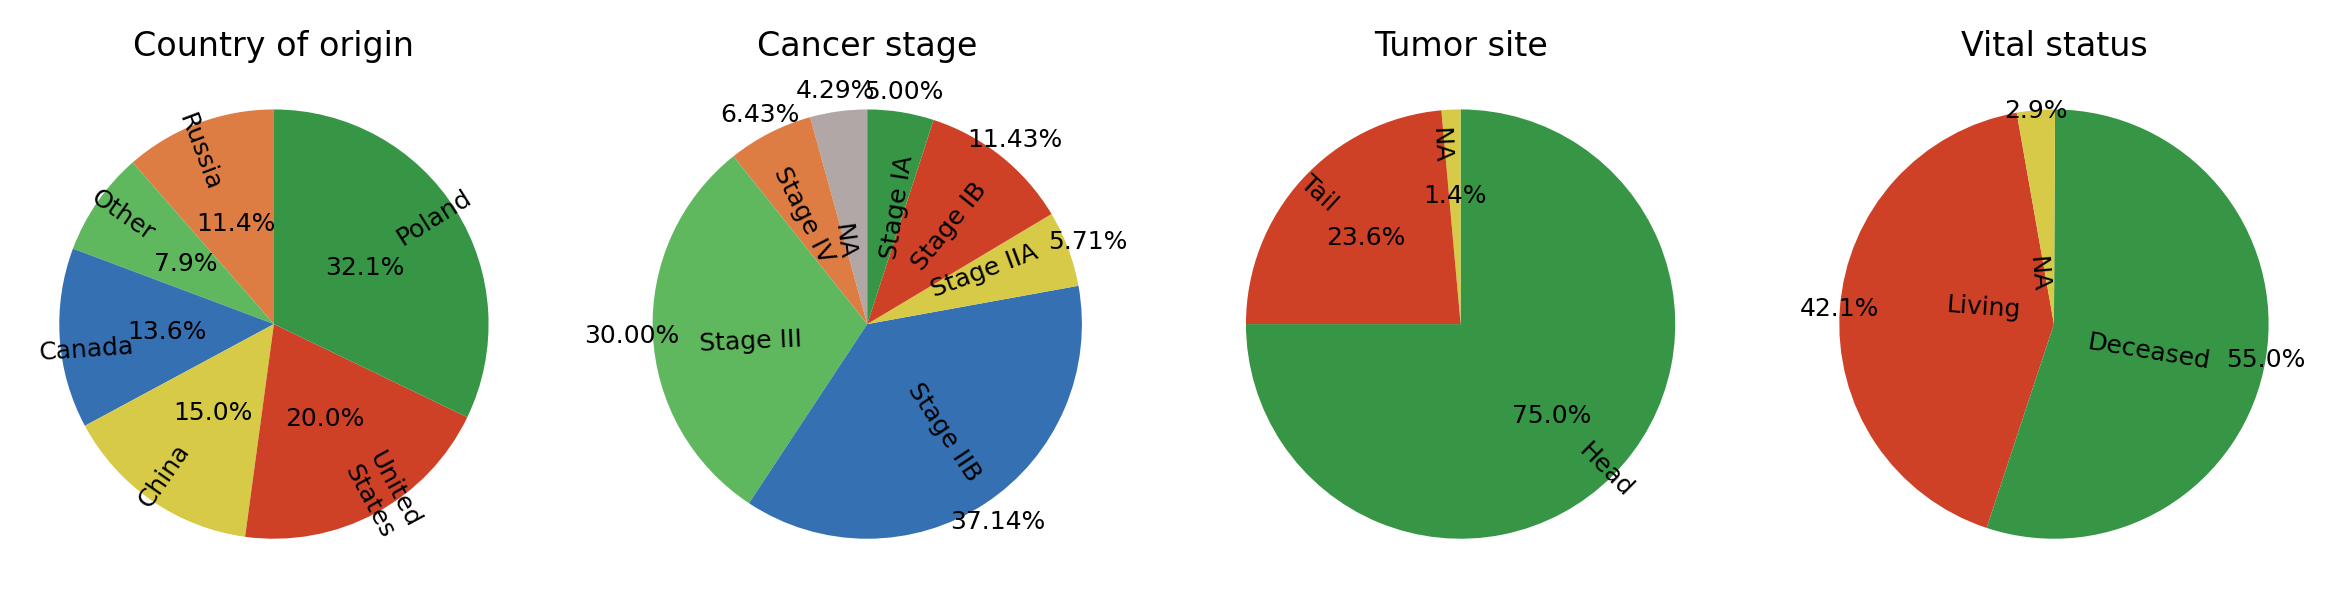

In [ ]:
TITLE_SIZE=8
FONT_SIZE=6
# Save into "Other" if not in Poland, United States, China, Canada, Russia, Other
fig, ax = plt.subplots(figsize=(8,2), dpi=300, ncols=4, nrows=1)

# Fig1b - 1: Country of origin
for i, row in b_df.iterrows():
    if row['participant_country'] not in ['Poland', 'United States', 'China', 'Canada', 'Russia']:
        b_df.at[i, 'participant_country'] = 'Other'
b_origin = b_df['participant_country'].value_counts()
b_origin = b_origin.reset_index()
b_origin['Percentage'] = b_origin['count'] / b_origin['count'].sum() * 100
# order by countries 0 : Poland, 1 : United States, 2 : China, 3 : Canada, 4 : Russia, 5 : Other
b_origin = b_origin.reindex([4, 5, 3, 2, 1, 0])

c_origin = {'Poland': C_GREEN, 'United States': C_RED, 'China': C_YELLOW, 
          'Canada': C_BLUE, 'Russia': C_LIGHTGREEN, 'Other': C_ORANGE}
ax[0].pie(b_origin['Percentage'], labels=["Russia", "Other", "Canada", "China", "United\nStates", "Poland"],
          autopct='%1.1f%%', 
          startangle=90, radius = 1.1,
        labeldistance=0.65, pctdistance=0.5, rotatelabels=True,
        colors = [c_origin[x] for x in b_origin['participant_country']],
        textprops={'fontsize': FONT_SIZE})
        
ax[0].set_title('Country of origin', fontsize = TITLE_SIZE)

# Fig1b - 2: Cancer stage
b_stage = b_df['tumor_stage_pathological'].value_counts()
b_stage = b_stage.reset_index()
b_stage['Percentage'] = b_stage['count'] / b_stage['count'].sum() * 100
b_stage = b_stage.reindex([6,3,1,0,4,2,5])

c_stage = {'Stage IA': C_GREEN, 'Stage IB': C_RED, 'Stage IIA': C_YELLOW,
            'Stage IIB': C_BLUE, 'Stage III': C_LIGHTGREEN, 'Stage IV': C_ORANGE, 'NA': C_GREY}
ax[1].pie(b_stage['Percentage'], labels=b_stage['tumor_stage_pathological'],
          colors = [c_stage[x] for x in b_stage['tumor_stage_pathological']],
          autopct='%1.2f%%', startangle=90, radius = 1.1,
          labeldistance=0.3, 
          pctdistance=1.1, rotatelabels=True,
          textprops={'fontsize': FONT_SIZE}
          )
ax[1].set_title('Cancer stage', fontsize = TITLE_SIZE)

# Fig1b - 3: Tumor site
# if 'head and body' -> head, 'head and tail' -> head, 'body and tail' -> tail, 'body' -> tail
for i, row in b_df.iterrows():
    if row['tumor_site'] == 'head and body':
        b_df.at[i, 'tumor_site'] = 'Head'
    elif row['tumor_site'] == 'head and tail':
        b_df.at[i, 'tumor_site'] = 'Head'
    elif row['tumor_site'] == 'body and tail':
        b_df.at[i, 'tumor_site'] = 'Tail'
    elif row['tumor_site'] == 'body':
        b_df.at[i, 'tumor_site'] = 'Tail'
    elif row['tumor_site'] == 'tail':
        b_df.at[i, 'tumor_site'] = 'Tail'
    elif row['tumor_site'] == 'head':
        b_df.at[i, 'tumor_site'] = 'Head'

b_site = b_df['tumor_site'].value_counts()
b_site = b_site.reset_index()
b_site['Percentage'] = b_site['count'] / b_site['count'].sum() * 100
b_site = b_site.reindex([0,2,1])
c_site = {'Head': C_GREEN, 'Tail': C_RED, 'NA': C_YELLOW}
ax[2].pie(b_site['Percentage'], labels=b_site['tumor_site'],
            autopct='%1.1f%%', startangle=180, radius = 1.1,
            labeldistance=0.75, pctdistance=0.6, rotatelabels=True,
            textprops={'fontsize': FONT_SIZE},
            colors = [c_site[x] for x in b_site['tumor_site']]
            )

ax[2].set_title('Tumor site', fontsize = TITLE_SIZE)

# Fig1b - 4: Vital status
b_vital = b_df['vital_status'].value_counts()
b_vital = b_vital.reset_index()
b_vital['Percentage'] = b_vital['count'] / b_vital['count'].sum() * 100
b_vital = b_vital.reindex([1,0,2])

c_vital = {'Living': C_RED, 'Deceased': C_GREEN, 'NA': C_YELLOW}
ax[3].pie(b_vital['Percentage'], labels=b_vital['vital_status'],
            autopct='%1.1f%%', startangle=100, radius = 1.1,
            labeldistance=0.15, pctdistance=1, rotatelabels=True,
            textprops={'fontsize': FONT_SIZE},
            colors = [c_vital[x] for x in b_vital['vital_status']]
            )
ax[3].set_title('Vital status', fontsize = TITLE_SIZE)

plt.tight_layout()
# plt.savefig('plot/fig1b.png', dpi=300) 
plt.show()

## Fig1-c. Molecular and histology-based tumor estimates are used to classify samples into “sufficient” and “low” purity groups.

## 